## `Создание процесса на Python`

### fork()

In [4]:
# создание процесса на Python

import time, os
# fork() - создаёт копию процесса
pid = os.fork() # системный вызов fork()

if pid == 0:
    # дочерный процесс
    while True:
        print("child: ", os.getpid())
        time.sleep(5)

else:
    # родительский процесс
    print("parent: ", os.getgid())
    os.wait()

child:  20692
parent:  1000


KeyboardInterrupt: 

KeyboardInterrupt: 

ERROR! Session/line number was not unique in database. History logging moved to new session 64


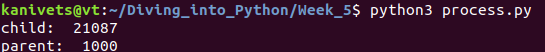
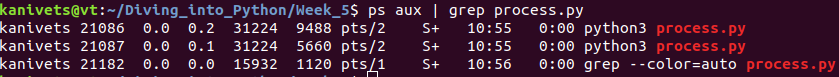

### ps axf | grep process.py - показать дочерный и родительский процессы

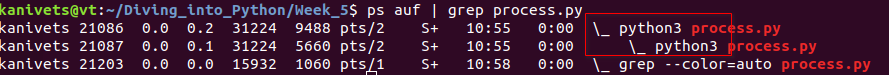
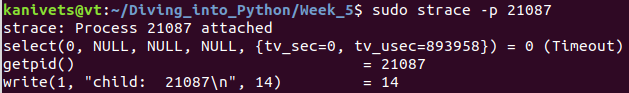
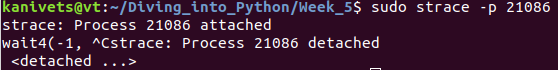

In [8]:
# память родительского и дочерного працессв
# у родительского своя и у дочерного своя

import os

foo = "bar"

if os.fork() == 0:
    # дочерный пример
    foo = "baz"
    print("child: ", foo)
else:
    # родительский процесс
    print("parent: ", foo)
    os.wait()

parent:  bar
child:  baz


In [13]:
# айлы в родительском и дочерном процессе 

# $ cat data.txt
# example string1
# example string2

import os

f = open("data.txt")
foo = f.readline()

if os.fork() == 0:
    # дочерный процесс
    foo = f.readline()
    print("child: ", foo)
else:
    # родительский процесс
    foo = f.readline()
    print("parent: ", foo)

parent:  example string2

child:  example string2



### Модуль multiprocessing

In [19]:
# Создание процесса, модуль multiprocessing
from multiprocessing import Process

def f(name):
    print("hello", name)

p = Process(target=f, args=("Bob",)) # опр. процесса
p.start() # создание процесса (вызов fork())
p.join() # ожидание всех созданых  дочерных процессов

hello Bob


In [22]:
# Создание процесса, модуль multiprocessing (альтернативный способ)
from multiprocessing import Process

class PrintProcess(Process):
    def __init__(self, name):
        super().__init__()
        self.name = name
    def run(self):
        print("hello", self.name)
        
p = PrintProcess("Bob") # опр. процесса (создание обьекта)
p.start() # создание процесса (вызов fork())
p.join() # ожидание всех созданых  дочерных процессов

hello Bob
